<a href="https://colab.research.google.com/github/PedroAlmeida18/PGP3_TESTESIND/blob/main/Datasetspythorch0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch

from torch import nn , optim

from torchvision import datasets

from torchvision import transforms

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
import numpy as np

args = {
    'batch_size':20,
    'num_workers':4,
    'num_classes':10,
    'lr':1e-4,
    'weight_decay':5e-4,
    'num_epocas':30
}
if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else :
  args['device'] = torch.device('gpu')
print(args['device'])

cuda


#DATASETS



In [30]:
train_set = datasets.MNIST('./',
                           train = True,
                           transform= transforms.ToTensor(),
                           download=True) # é uma classe, se necessário implementar é necessário criar uma classe
                                          #cada elemento é um atupla, ou seja, uma linha no formato dado, rotulo
test_set = datasets.MNIST('./',
                           train = False,
                           transform= transforms.ToTensor(),
                           download=False)
print('Amostras de treino :'+ str(len(train_set)) + '\nAmostras de Teste :' + str(len(test_set)))

Amostras de treino :60000
Amostras de Teste :10000


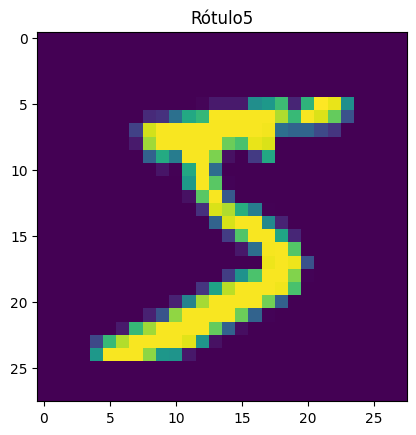

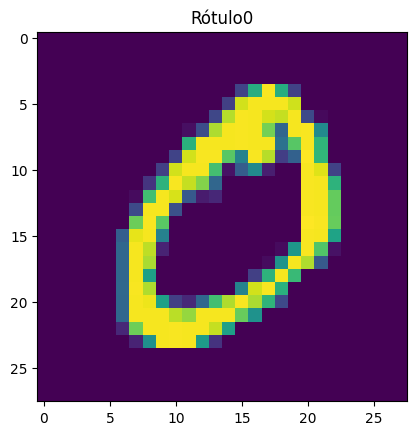

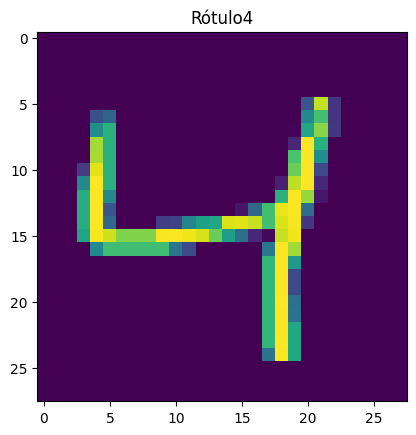

In [31]:
for i in range(3):
  dado, rotulo = train_set[i]

  plt.figure()
  plt.imshow(dado[0])
  plt.title('Rótulo'+ str(rotulo))

#Dataloader


1.   Separação dos dados em batches
2.   Embaralhamento os dados
3.  Carregando batches em paralelo com threads obs: Não pode ser indexado





torch.Size([20, 1, 28, 28]) torch.Size([20])


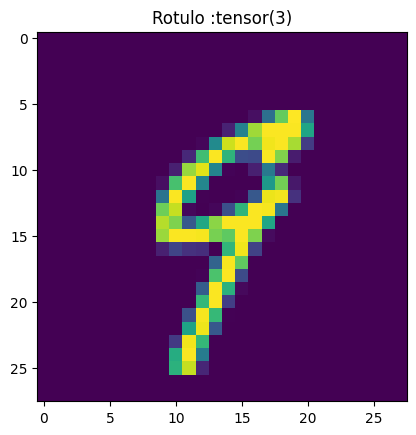

In [33]:
train_loader = DataLoader(train_set,
                          batch_size = args['batch_size'],
                          shuffle=True,
                          num_workers= args['num_workers'])

test_loader = DataLoader(test_set,
                          batch_size = args['batch_size'],
                          shuffle=True,
                         num_workers= args['num_workers'])

#Como fazer para indexar dentro de um for, com o uso de quebrar a tupla
for batch in train_loader:
  dado, rotulo = batch
  print(dado.size(), rotulo.size())
  plt.imshow(dado[2][0]) #o primeiro []é para dizer qual elemento do batch eu quero, o segundo é para uma dimensão a mais
  plt.title('Rotulo :'+str(rotulo[0]))
  break


#AULA FLUXO DE TREINAMENTO , IMPLEMENTANDO O MLP

In [34]:

# CRIAÇÃO DA REDE
class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features = nn.Sequential(nn.Linear(input_size, hidden_size),
                                  nn.ReLU(),
                                  nn.Linear(hidden_size, hidden_size)
                                  )
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    #Linearlizar o tensor que é 20,1,28,28 para passar na camada linear
    X=X.view(X.size(0),-1) #Redimensionar
    feature = self.features(X)
    output  = self.softmax(self.out(feature))

    return output

input_size  = 28*28
hidden_size = 128
out_size    = 10

net = MLP(input_size, hidden_size, out_size).to(args['device'])

#Loss e otimizador

In [35]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer =optim.Adam(net.parameters(),lr=args['lr'],weight_decay=args['weight_decay'])

#Fluxo de treinamento

In [37]:
for epocas in range(args['num_epocas']):
  epoca_loss=[]

  for batch in train_loader:
      dado, rotulo = batch

      #cast na GPU

      dado = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      #Forward
      pred = net(dado)
      loss = criterion(pred, rotulo)
      epoca_loss.append(loss.cpu().data)

      #backward
      loss.backward()
      optimizer.step()

  epoca_loss = np.asarray(epoca_loss)
  print("Epoca%d, Loss:%.4f +\- %.4f" % (epocas,epoca_loss.mean(),epoca_loss.std()))




Epoca0, Loss:1.7829 +\- 0.1091
Epoca1, Loss:1.7950 +\- 0.1134


KeyboardInterrupt: 